In [1]:
from datetime import datetime
import locdatalib
import config
import matplotlib.pyplot as plt
from pylab import rcParams

config.init()
# TODO Refer to RescueTime data for debugging

In [2]:
location_entries = locdatalib.get_locations(config.LOC_FILEPATH)  # Performance bottleneck

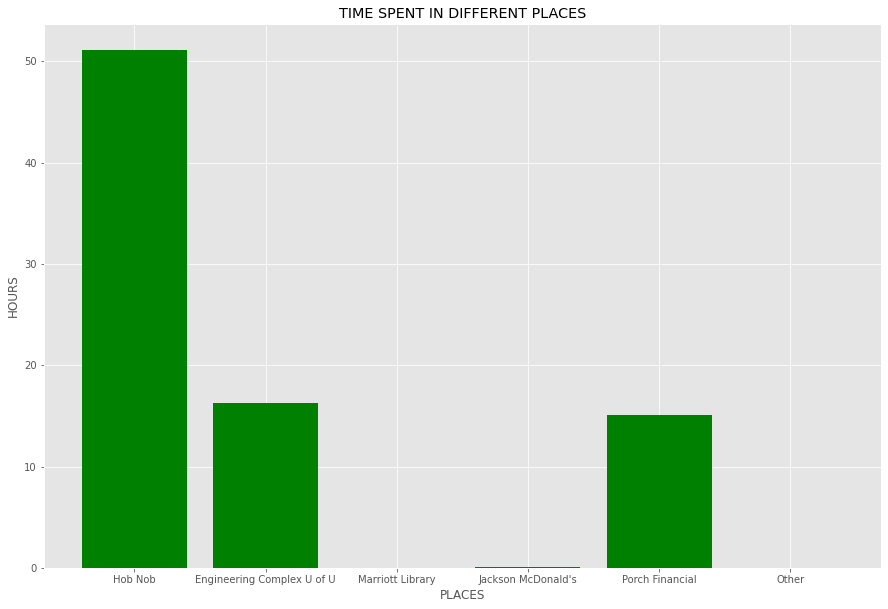

In [3]:
start_time = datetime(2019, 11, 18)
end_time = datetime(2019, 11, 22)

# print(locdatalib.len_of_time_with_epsilon_of_coord_on_time_interval(config.JACKSON_AVE, start_time, end_time, location_entries))

rcParams['figure.figsize'] = 15, 10

plt.style.use('ggplot')

x = [elem.name for elem in config.MY_PLACES]
x.append('Other')
x_pos = [i for i, _ in enumerate(x)]
y = locdatalib.calc_hours_from_list_of_places(config.MY_PLACES,
    start_time, end_time, location_entries)
y.append(0) # TODO: calculate other time

plt.bar(x_pos, y, color='green')
plt.xlabel("PLACES")
plt.ylabel("HOURS")
plt.title("TIME SPENT IN DIFFERENT PLACES")

plt.xticks(x_pos, x)

plt.show()

    